In [1]:
!pip install tensorflow opencv-python matplotlib

In [2]:
pip list

Package                       Version
----------------------------- --------------------
absl-py                       1.4.0
aiohttp                       3.8.1
aiosignal                     1.2.0
alabaster                     0.7.12
anaconda-client               1.11.0
anaconda-navigator            2.3.0
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.2
astroid                       2.6.6
astropy                       5.1
asttokens                     2.0.5
astunparse                    1.6.3
async-timeout                 4.0.1
atomicwrites                  1.4.0
attrs                         21.4.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.9.1
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfile            1.0
backport

Note: you may need to restart the kernel to use updated packages.


In [7]:
# Import required libraries
import tensorflow as tf
import os

In [4]:
os.path.join('data', 'happy')

'data/happy'

In [8]:
gpus = tf.config.experimental.list_physical_devices('CPU')
gpus

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [6]:
len(gpus)

1

In [7]:
#Avoid OOM errors by setting GPU Memory Consumrtion Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

## 1.2 Remove dodgy images

In [14]:
# Import required libraries
import cv2
import imghdr
from matplotlib import pyplot as plt

In [15]:
# Define the path to the data directory
data_dir = '/home/mitraa/Jupyter Notebook/Emotion Detection CNN/datas'

In [16]:
# Print the list of files in the 'happy' subdirectory of the data directory
os.listdir(os.path.join(data_dir, 'happy'))

['jumping-and-dancing-happy-people-positive-emotions-set-illustration-free-vector.jpg',
 'smile.woman_.jpg',
 'AOLn63FpC7c2362vQI93kpEjbgobDYcM8VzaVLuBKTEWs64-c-mo.jpg',
 'goup-happy-people-group-jumping-isolated-white-background-35582232.jpg',
 'png-transparent-graphy-happy-people-love-child-photography-thumbnail.png',
 'happyball-3.jpg',
 'e60b714c-07cf-417a-912f-5758293ce23b_1140x641.jpg',
 'happypeople-1024x679.jpg',
 'GettyImages-871518740-1024x707.jpg',
 '20150413185238-secrets-happy-entrepreneurs-woman-gratitude-rainbow-.jpeg',
 'file-20230208-27-3jttof.jpg',
 'happy-person.jpeg',
 'image29.jpeg',
 'gdfVVm_MyCRtqpvdkt8vtSB1n_oz_CpwCq6vNMpj0S8.jpg',
 'ipsos-global-advisor-happiness-2022-opti.jpg',
 '_happy_jumping_on_beach-40815.jpg',
 'image22.jpeg',
 'friends-happy-190821.jpg',
 'images2.jpg',
 'GettyImages-454356720.jpg',
 'Dollarphotoclub_76084977-1.jpg',
 'what-makes-people-happy1.jpg',
 'image21.jpeg',
 '05-12-21-happy-people.jpg',
 'compassion-900x387.jpg',
 'happy-people-

In [17]:
# Define a list of valid image file extensions
image_exts = ['jpeg','jpg','bmp','png']

In [18]:
# Loop over each directory in the data directory
for image_class in os.listdir(data_dir):
    # Loop over each file in the current directory
    for image in os.listdir(os.path.join(data_dir, image_class)):
        print(image)

jumping-and-dancing-happy-people-positive-emotions-set-illustration-free-vector.jpg
smile.woman_.jpg
AOLn63FpC7c2362vQI93kpEjbgobDYcM8VzaVLuBKTEWs64-c-mo.jpg
goup-happy-people-group-jumping-isolated-white-background-35582232.jpg
png-transparent-graphy-happy-people-love-child-photography-thumbnail.png
happyball-3.jpg
e60b714c-07cf-417a-912f-5758293ce23b_1140x641.jpg
happypeople-1024x679.jpg
GettyImages-871518740-1024x707.jpg
20150413185238-secrets-happy-entrepreneurs-woman-gratitude-rainbow-.jpeg
file-20230208-27-3jttof.jpg
happy-person.jpeg
image29.jpeg
gdfVVm_MyCRtqpvdkt8vtSB1n_oz_CpwCq6vNMpj0S8.jpg
ipsos-global-advisor-happiness-2022-opti.jpg
_happy_jumping_on_beach-40815.jpg
image22.jpeg
friends-happy-190821.jpg
images2.jpg
GettyImages-454356720.jpg
Dollarphotoclub_76084977-1.jpg
what-makes-people-happy1.jpg
image21.jpeg
05-12-21-happy-people.jpg
compassion-900x387.jpg
happy-people-using-mobile-smart-phone-men-women-94083621.jpg
image17.jpeg
friends_190412.jpg
happy-people-habits.jp

In [19]:
# Load an example image and display its shape and content
img = cv2.imread(os.path.join('datas','happy','05-12-21-happy-people.jpg'))
img.shape

(880, 1400, 3)

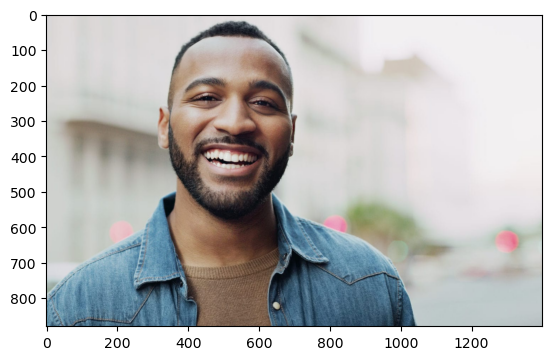

In [20]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [21]:
# Loop over each directory in the data directory
for image_class in os.listdir(data_dir):
    # Loop over each file in the current directory
    for image in os.listdir(os.path.join(data_dir, image_class)):
        # Construct the full path to the current image
        image_path = os.path.join(data_dir, image_class, image)
        try:
            # Read the image data and determine its file type using the imghdr module
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            # If the file type is not one of the valid image extensions, delete the file
            if tip not in image_exts:
                print('Image not in exts list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            # If an error occurs while processing the image, delete the file
            print('Issue with image {}'.format(image_path))
            #os.remove(image_path)

## 1.3 Load Data

In [22]:
tf.data.Dataset??

In [23]:
# Import required libraries
import numpy as np

In [24]:
tf.keras.utils.image_dataset_from_directory??

In [24]:
# Load the image data into a TensorFlow dataset object
data = tf.keras.utils.image_dataset_from_directory('datas')

Found 104 files belonging to 2 classes.


In [25]:
# Get an iterator over the dataset
data_iterator = data.as_numpy_iterator()
data_iterator

2023-05-26 22:38:20.143604: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [104]
	 [[{{node Placeholder/_0}}]]
2023-05-26 22:38:20.143813: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [104]
	 [[{{node Placeholder/_4}}]]


In [26]:
# Get another batch from the itterator
# Get the first batch of images and their corresponding labels
batch = data_iterator.next()
batch

(array([[[[ 91.       , 103.       , 103.       ],
          [ 93.84778  , 105.84778  , 105.84778  ],
          [ 93.47766  , 105.47766  , 105.47766  ],
          ...,
          [140.       , 149.       , 146.       ],
          [137.       , 146.       , 143.       ],
          [137.67188  , 146.67188  , 143.67188  ]],
 
         [[ 91.00403  , 103.00403  , 103.00403  ],
          [ 93.77698  , 105.77698  , 105.77698  ],
          [ 93.015625 , 105.015625 , 105.015625 ],
          ...,
          [139.71545  , 148.71545  , 145.71545  ],
          [137.00354  , 146.00354  , 141.00354  ],
          [137.01562  , 146.01562  , 141.01562  ]],
 
         [[ 91.04016  , 103.04016  , 103.04016  ],
          [ 93.640625 , 105.640625 , 105.640625 ],
          [ 93.455444 , 105.455444 , 105.455444 ],
          ...,
          [139.35156  , 148.35156  , 145.35156  ],
          [136.86719  , 145.86719  , 140.86719  ],
          [137.       , 146.       , 141.       ]],
 
         ...,
 
         [[1

In [27]:
# Images represented as numpy arrays:
# Print the shape of the images in the batch
batch[0].shape

(32, 256, 256, 3)

In [28]:
# Class 1 = SAD PPL
# Class 0 = HAPPY PPL
# Print the labels of the images in the batch
batch[1]

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0], dtype=int32)

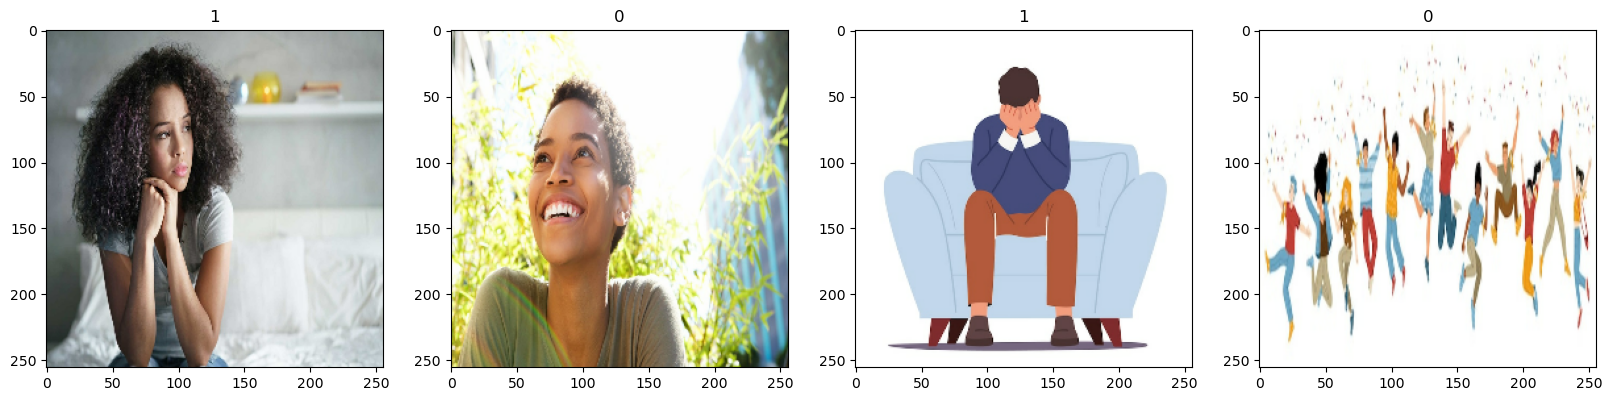

In [29]:
# Display the first four images in the batch along with their labels
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [30]:
# Scale the pixel values of the images to be between 0 and 1
scaled = batch[0] / 255
scaled.min()

0.0

In [31]:
# Print the minimum and maximum pixel values of the scaled images
scaled.max()

1.0

# 2. Preprocess Data


## 2.1 Scale Data

In [32]:
# Apply the scaling function to the entire dataset using the map() method
data = data.map(lambda x,y: (x/255,y))

In [33]:
# Get an iterator over the scaled dataset
scaled_iterator = data.as_numpy_iterator()

2023-05-26 22:38:38.385517: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [104]
	 [[{{node Placeholder/_4}}]]
2023-05-26 22:38:38.385823: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [104]
	 [[{{node Placeholder/_4}}]]


In [34]:
# Get the first batch of images and their corresponding labels from the scaled dataset
batch = scaled_iterator.next()

In [35]:
# Print the maximum pixel value of the images in the batch
batch[0].max()

1.0

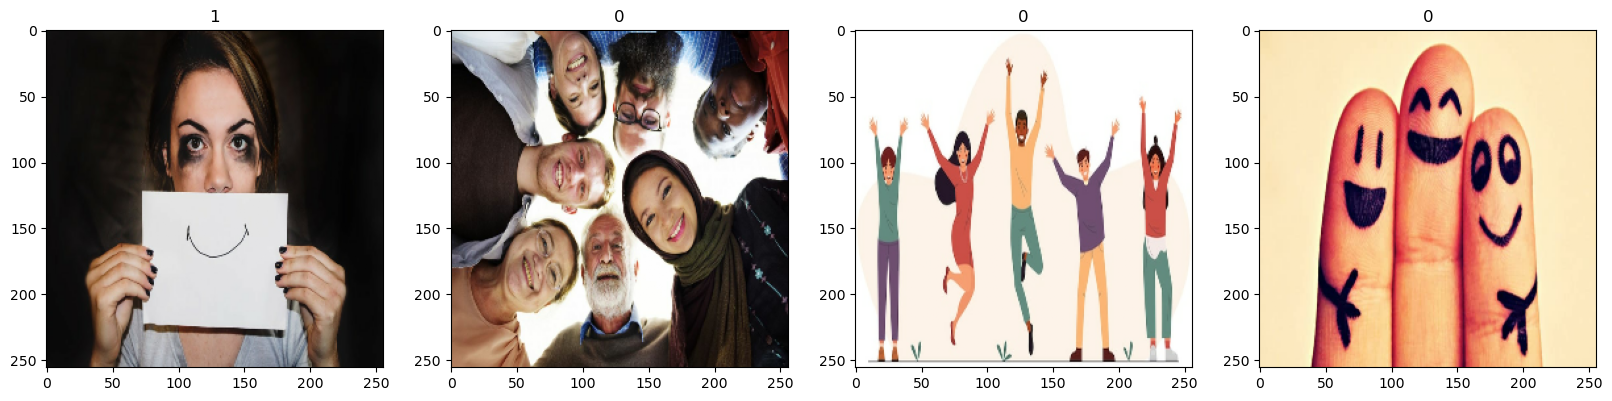

In [36]:
# Display the first four images in the batch from the scaled dataset
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

## 2.2 Split Data

In [37]:
len(data)

4

In [38]:
# Calculate the sizes of the training, validation, and testing sets
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [39]:
train_size + test_size + val_size

4

In [40]:
# Split the dataset into training, validation, and testing sets using the take() and skip() methods
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [41]:
len(train)

2

# 3 Deep Model

## 3.1 Build Deep Learning Model

In [42]:
# Import required libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [43]:
model = Sequential()

In [44]:
# Define the neural network architecture
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [45]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [46]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

## 3.2 Train

In [47]:
logdir = 'logs'

In [48]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [49]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20


2023-05-26 22:39:09.496250: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [104]
	 [[{{node Placeholder/_4}}]]
2023-05-26 22:39:09.496443: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [104]
	 [[{{node Placeholder/_0}}]]


2/2 [==============================] - ETA: 0s - loss: 1.2739 - accuracy: 0.5625

2023-05-26 22:39:10.813526: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [104]
	 [[{{node Placeholder/_4}}]]
2023-05-26 22:39:10.813763: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [104]
	 [[{{node Placeholder/_4}}]]


2/2 [==============================] - 2s 757ms/step - loss: 1.2739 - accuracy: 0.5625 - val_loss: 0.7612 - val_accuracy: 0.3438
Epoch 2/20
2/2 [==============================] - 1s 667ms/step - loss: 0.8204 - accuracy: 0.5156 - val_loss: 0.8577 - val_accuracy: 0.5000
Epoch 3/20
2/2 [==============================] - 1s 675ms/step - loss: 0.8028 - accuracy: 0.4688 - val_loss: 0.6363 - val_accuracy: 0.5625
Epoch 4/20
2/2 [==============================] - 1s 666ms/step - loss: 0.6681 - accuracy: 0.6094 - val_loss: 0.5803 - val_accuracy: 0.6250
Epoch 5/20
2/2 [==============================] - 1s 677ms/step - loss: 0.6028 - accuracy: 0.6094 - val_loss: 0.5519 - val_accuracy: 0.6875
Epoch 6/20
2/2 [==============================] - 1s 660ms/step - loss: 0.5869 - accuracy: 0.6406 - val_loss: 0.5614 - val_accuracy: 0.6562
Epoch 7/20
2/2 [==============================] - 1s 703ms/step - loss: 0.5704 - accuracy: 0.6250 - val_loss: 0.6600 - val_accuracy: 0.5938
Epoch 8/20
2/2 [===============

In [50]:
 hist.history

{'loss': [1.2739248275756836,
  0.8203575611114502,
  0.8027645349502563,
  0.668094277381897,
  0.6028051376342773,
  0.5869278907775879,
  0.5703657865524292,
  0.6179414391517639,
  0.4975912272930145,
  0.4839169383049011,
  0.41059646010398865,
  0.4186955690383911,
  0.33770835399627686,
  0.2953498661518097,
  0.20367908477783203,
  0.20155374705791473,
  0.18512463569641113,
  0.1547166407108307,
  0.16352084279060364,
  0.1411716192960739],
 'accuracy': [0.5625,
  0.515625,
  0.46875,
  0.609375,
  0.609375,
  0.640625,
  0.625,
  0.5625,
  0.921875,
  0.953125,
  0.890625,
  0.8125,
  0.921875,
  0.90625,
  0.953125,
  0.953125,
  0.953125,
  0.953125,
  0.984375,
  0.953125],
 'val_loss': [0.7611843943595886,
  0.8576817512512207,
  0.6363343000411987,
  0.5803086161613464,
  0.5518509745597839,
  0.5613839626312256,
  0.6599749326705933,
  0.4715197682380676,
  0.5766340494155884,
  0.3738892674446106,
  0.47352057695388794,
  0.3620274066925049,
  0.20964154601097107,
  0.

## 3.3 Plot Performance

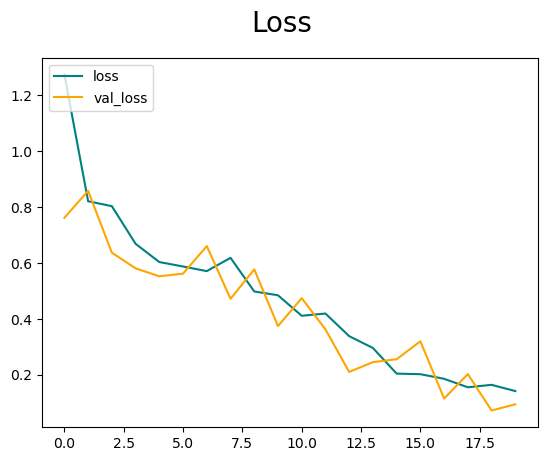

In [51]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

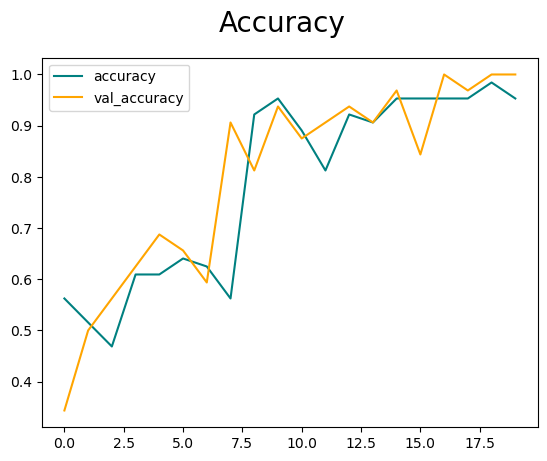

In [52]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# Evaluate Performance

## 4.1 Evaluate 

In [53]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [54]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [55]:
len(test)

1

In [56]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

2023-05-26 22:40:01.572214: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [104]
	 [[{{node Placeholder/_0}}]]
2023-05-26 22:40:01.572479: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [104]
	 [[{{node Placeholder/_4}}]]


1/1 [==============================] - 0s 63ms/step


In [58]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:1.0, Recall:1.0, Accuracy:1.0


## 4.2 Test

In [ ]:
img = cv2.imread